In [15]:
import analytical_solutions
%matplotlib inline

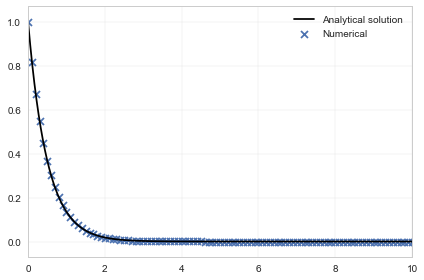

In [16]:
analytical_solutions.reaction_equation_plot()

Simulation starts  with following params:
	tend = 5.0,
	dt = 1.00e-03,
	L = 100.0,
	dx = 1.00e-01,
	w = 5.00
Simulation started:
	 2017-09-01 22:42:33


Estimated time of the code execution:
	 0h:00m:02s
Will finish approx.:
	 2017-09-01 22:42:36


/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


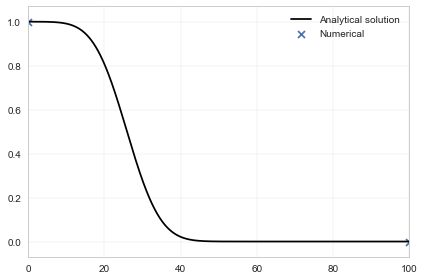

In [17]:
analytical_solutions.transport_equation_plot()

Automatic pdb calling has been turned ON
Simulation starts  with following params:
	tend = 5.0,
	dt = 1.00e-03,
	L = 30.0,
	dx = 1.00e-01,
	w = 5.00
Simulation started:
	 2017-09-01 22:42:36


Estimated time of the code execution:
	 0h:00m:01s
Will finish approx.:
	 2017-09-01 22:42:37


/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:155: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


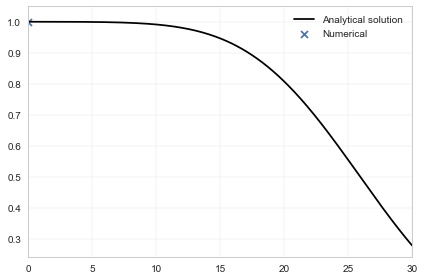

In [18]:
%pdb on
analytical_solutions.transport_equation_boundary_effect()

> /Users/MarkelovIgor/git/biogeochemistry/PorousMedia/src/DESolver.py(79)create_template_AL_AR()
-> return AL, AR
(Pdb) AL.toarray()
array([[ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [-0.0625,  0.75  , -0.0625, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , -0.0625,  0.75  , ...,  0.    ,  0.    ,  0.    ],
       ..., 
       [ 0.    ,  0.    ,  0.    , ...,  0.75  , -0.0625,  0.    ],
       [ 0.    ,  0.    ,  0.    , ..., -0.0625,  0.75  , -0.0625],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  1.    ]])
(Pdb) AR.toarray()
array([[ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.0625,  1.25  ,  0.0625, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.0625,  1.25  , ...,  0.    ,  0.    ,  0.    ],
       ..., 
       [ 0.    ,  0.    ,  0.    , ...,  1.25  ,  0.0625,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.0625,  1.25  ,  0.0625],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  1.    ]])
(Pdb

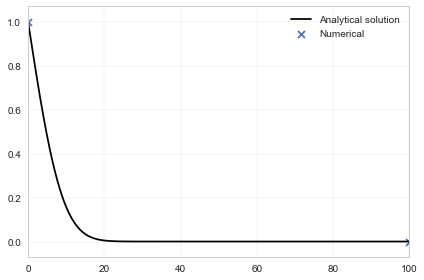

In [33]:
analytical_solutions.transport_equation_plot_non_uniform_grid()

> /Users/MarkelovIgor/git/biogeochemistry/PorousMedia/src/DESolver.py(138)create_template_AL_AR_uniform()
-> return AL, AR
(Pdb) AL.toarray()
array([[ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [-0.2625,  1.5   , -0.2375, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , -0.2625,  1.5   , ...,  0.    ,  0.    ,  0.    ],
       ..., 
       [ 0.    ,  0.    ,  0.    , ...,  1.5   , -0.2375,  0.    ],
       [ 0.    ,  0.    ,  0.    , ..., -0.2625,  1.5   , -0.2375],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  1.    ]])
(Pdb) AR.toarray()
array([[ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.2625,  0.5   ,  0.2375, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.2625,  0.5   , ...,  0.    ,  0.    ,  0.    ],
       ..., 
       [ 0.    ,  0.    ,  0.    , ...,  0.5   ,  0.2375,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.2625,  0.5   ,  0.2375],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  1.   

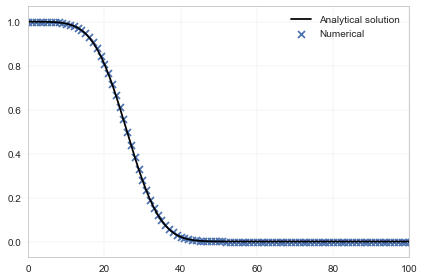

In [28]:
analytical_solutions.transport_equation_plot_non_uniform_grid()

In [29]:
1

1